In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Load data from parquet files
X_train = pd.read_parquet('data/X_train.parquet')
X_test = pd.read_parquet('data/X_test.parquet')
y_train = pd.read_parquet('data/y_train.parquet')
y_test = pd.read_parquet('data/y_test.parquet')


# Display X_test to verify changes
X_test


,Год,"Cooтношение дебиторской задолженности к активам компании, %","Доля рабочего капитала в активах компании, %","Коэффициент абсолютной ликвидности, %","Коэффициент быстрой ликвидности, %","Коэффициент обеспеченности собственными оборотными средствами, %","Коэффициент оборачиваемости совокупных активов, %","Коэффициент соотношения заемных и собственных средств, %","Коэффициент текущей ликвидности, %","Период оборота активов, дни",...,"Период оборота активов, дни_change_last_4_years","Период оборота запасов, дни_change_last_4_years","Период оборота основных средств, дни_change_last_4_years","Период погашения дебиторской задолженности, дни_change_last_4_years","Период погашения кредиторской задолженности, дни_change_last_4_years","Рентабельность активов (ROA), %_change_last_4_years","Рентабельность затрат, %_change_last_4_years","Рентабельность капитала (ROE), %_change_last_4_years","Рентабельность продаж, %_change_last_4_years","Соотношение чистого долга к капиталу, %_change_last_4_years"
0,2019,0.7237,-0.0448,0.0918,0.8372,-0.0482,1.7825,37.2207,0.9540,205.0,...,210.606061,5.460751,0.000000,296.875000,276.424480,-81.983806,-9.803922,-82.831888,-9.933775,-58.035330
1,2022,0.3942,0.1370,0.5337,1.0047,0.1399,3.0585,5.1629,1.1637,119.0,...,95.302013,403.968254,-61.904762,1.515152,124.687355,-79.758308,89.166667,-70.065482,84.680851,368550.000000
2,2019,0.2594,0.0803,0.7969,1.0910,0.7009,2.8589,1.2387,1.0910,128.0,...,412.000000,950.000000,-48.245614,5400.000000,382.743745,-90.773532,-52.688172,-88.292746,-53.763441,37.259732
3,2020,0.1858,0.0281,0.1356,0.3360,0.0287,2.2018,20.4421,1.0295,166.0,...,-75.806452,67.368421,0.000000,-94.736842,-81.384404,223.340249,-32.154341,198.984772,-30.769231,-87.675726
4,2022,0.8469,0.0335,0.0585,0.9485,-0.0146,2.1005,3931.5055,1.0351,174.0,...,-62.790698,-87.922211,0.000000,-28.813559,-69.956474,-94.736842,-132.340426,-119.308147,-133.624454,523.317709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,2017,0.3316,-0.0166,0.1349,0.4730,-0.0171,0.7616,201.2253,0.9833,479.0,...,354.861111,3899.029126,980.000000,78.048780,366.933440,-101.551724,-95.364238,-118.370214,-95.221843,48.148979
1651,2016,0.5203,0.0134,0.0875,0.6167,0.0135,2.0962,58.3588,1.0137,174.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1652,2015,0.9211,0.0143,0.0801,1.0145,0.0143,3.4908,69.0438,1.0145,105.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1653,2022,0.1175,0.4361,0.5148,2.0458,-0.4109,3.9027,3.0636,5.4401,94.0,...,36.220472,350.746269,65.402844,-28.750000,14.247646,45.728643,22.823529,-38.170669,21.568627,-76.269097


In [2]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
logreg_classifier = LogisticRegression()

# Train the classifier on the training data
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Compute classification metrics for Logistic Regression
classification_metrics_logreg = classification_report(y_test, y_pred_logreg)
print("Metrics for Logistic Regression:")
print(classification_metrics_logreg)


Metrics for Logistic Regression:
              precision    recall  f1-score   support

       False       0.52      0.44      0.48       189
        True       0.52      0.60      0.55       189

    accuracy                           0.52       378
   macro avg       0.52      0.52      0.52       378
weighted avg       0.52      0.52      0.52       378



/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
# Обучите модель RandomForestClassifier




dt_regressor = RandomForestClassifier()
dt_regressor.fit(X_train, y_train)
# Сделайте предсказания на тестовом наборе
y_pred_dt = dt_regressor.predict(X_test)
# Вычислите метрики для RandomForestClassifier
classification_metrics = classification_report(y_test, y_pred_dt)

print("Metrics for RandomForestClassifier:")
print(classification_metrics)
print("\n")

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Metrics for RandomForestClassifier:
              precision    recall  f1-score   support

       False       0.64      0.65      0.64       189
        True       0.64      0.64      0.64       189

    accuracy                           0.64       378
   macro avg       0.64      0.64      0.64       378
weighted avg       0.64      0.64      0.64       378





Metrics for XGBoost:
              precision    recall  f1-score   support

       False       0.66      0.56      0.61       189
        True       0.62      0.71      0.66       189

    accuracy                           0.63       378
   macro avg       0.64      0.63      0.63       378
weighted avg       0.64      0.63      0.63       378



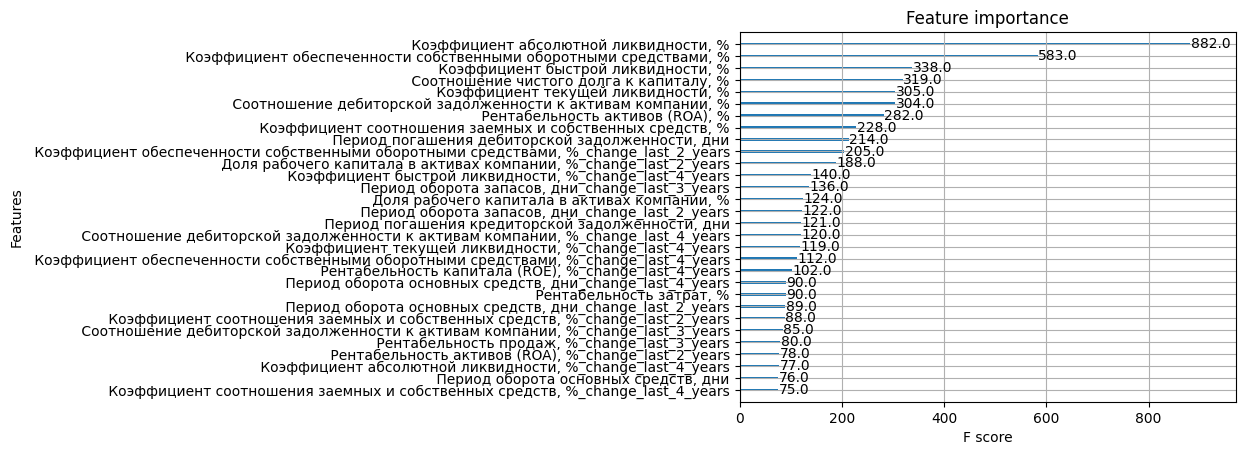

MAE: 0.36507936507936506
RMSE: 0.6042179781166438
R^2: -0.46031746031746024


In [4]:


from matplotlib import pyplot as plt
import xgboost as xgb


xgb_params = {
    "max_depth": 11,
    "n_estimators": 1400,
    "learning_rate": 0.008781656638746381,
    "subsample": 0.6,
    "gamma": 0.29755378168019975,
    "min_child_weight": 0.45494858897880436,
    "max_delta_step": 0.026471031663807418,
    "colsample_bytree": 0.7739736164687274,
    "reg_alpha": 0.3991641779105313,
    "reg_lambda": 0.7514830878709566,
    "scale_pos_weight": 1.0328091108038073
}

# Обучите модель XGBClassifier
xgb_regressor = xgb.XGBClassifier(**xgb_params)
xgb_regressor.fit(X_train, y_train)

# Сделайте предсказания на тестовом наборе
y_pred_xgb = xgb_regressor.predict(X_test)

# Вычислите метрики для XGBClassifier
classification_metrics = classification_report(y_test, y_pred_xgb)

print("Metrics for XGBoost:")
print(classification_metrics)

# Plot feature importance
xgb.plot_importance(xgb_regressor, max_num_features=30)
plt.show()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred_xgb)
print(f"MAE: {mae}")

# Вычисление RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"RMSE: {rmse}")

# Вычисление R^2
r2 = r2_score(y_test, y_pred_xgb)
print(f"R^2: {r2}")

In [5]:
# Преобразование в одномерный массив
y_test_1d = y_test.values.ravel()

# Создание датафрейма с предсказанными и фактическими значениями и значениями из X_test
df_predictions = pd.DataFrame({'Actual': y_test_1d, 'Predicted': y_pred_xgb})
df_predictions = pd.concat([df_predictions, pd.DataFrame(X_test)], axis=1)
df_predictions

,Actual,Predicted,Год,"Cooтношение дебиторской задолженности к активам компании, %","Доля рабочего капитала в активах компании, %","Коэффициент абсолютной ликвидности, %","Коэффициент быстрой ликвидности, %","Коэффициент обеспеченности собственными оборотными средствами, %","Коэффициент оборачиваемости совокупных активов, %","Коэффициент соотношения заемных и собственных средств, %",...,"Период оборота активов, дни_change_last_4_years","Период оборота запасов, дни_change_last_4_years","Период оборота основных средств, дни_change_last_4_years","Период погашения дебиторской задолженности, дни_change_last_4_years","Период погашения кредиторской задолженности, дни_change_last_4_years","Рентабельность активов (ROA), %_change_last_4_years","Рентабельность затрат, %_change_last_4_years","Рентабельность капитала (ROE), %_change_last_4_years","Рентабельность продаж, %_change_last_4_years","Соотношение чистого долга к капиталу, %_change_last_4_years"
0,True,0,2013,0.2715,0.6286,0.1054,1.7145,-0.0282,0.5418,12.2492,...,1451.928021,2123.074074,473.758865,560.869565,3840.199889,-275.000000,40.630975,-2038.516746,35.480465,-6170.379103
1,False,0,2015,0.1629,-0.6735,0.0045,0.2835,-2.0581,0.0103,-1410.3783,...,-96.595069,-95.847958,-95.447478,-98.569881,-96.540498,0.000000,-54.545455,440.000000,-55.384615,-99.945968
2,False,0,2013,0.1462,-0.3288,0.0791,0.2535,-0.6401,0.4320,5.4494,...,62.150221,9.796534,44.692737,-5.555556,-42.634572,118.273646,-131.060606,29.277461,-133.925687,-2436.000000
3,True,0,2013,0.0168,0.5298,1.6215,1.7733,0.5327,0.3263,0.8479,...,-21.321962,11.936880,-50.577367,-89.843750,-69.044547,-79.523810,49.540292,-83.047210,68.518519,181.759193
4,False,1,2015,0.3353,-0.0488,0.2048,0.5890,-0.0826,1.0057,18.0874,...,15.151515,-61.575955,148.242812,38.211382,20.785939,1004.597701,855.479452,197.968684,750.694444,-110.086239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,True,1,2019,0.8981,0.0156,0.0687,1.0159,0.0156,11.1280,63.0556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
374,True,1,2018,0.5811,-0.1011,0.1982,0.8193,-0.1143,1.2177,67.6512,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
375,True,1,2018,0.6474,0.0922,0.0010,0.8408,0.0970,0.8245,3.5535,...,235.606061,1993.939394,515.841584,180.180180,181.717707,-94.055944,-86.732373,-96.088631,-85.236052,-99.173789
376,False,0,2019,0.1742,0.0896,0.5985,0.8459,-0.1904,0.7502,27.9462,...,-61.472603,-3.368794,-57.500000,-79.368932,-52.875049,4.494382,-56.684492,1024.061810,-55.955679,-17244.137931


In [6]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
y_train_gbm = y_train.astype(int)
y_test_gbm = y_test.astype(int)
X_train_gbm = X_train
X_test_gbm = X_test
# Переименовать столбцы, заменяя запрещенные символы на разрешенные
X_train_gbm.columns = ["".join(c if c.isalnum() or c in {'_', '.'} else '_' for c in str(x)) for x in X_train.columns]
X_test_gbm.columns = ["".join(c if c.isalnum() or c in {'_', '.'} else '_' for c in str(x)) for x in X_test.columns]

# Create an instance of the LGBMClassifier
lgbm_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',  # Metric for binary classification
}

lgbm_classifier = LGBMClassifier(**lgbm_params)

# Train the classifier on the training data
lgbm_classifier.fit(X_train_gbm, y_train_gbm, eval_metric='auc', eval_set=[(X_test_gbm, y_test_gbm)])

# Make predictions on the test set
y_pred_lgbm = lgbm_classifier.predict(X_test_gbm)

# Compute classification metrics for LightGBM
classification_metrics_lgbm = classification_report(y_test_gbm, y_pred_lgbm)
print("Metrics for LightGBM:")
print(classification_metrics_lgbm)



/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 441, number of negative: 441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18261
[LightGBM] [Info] Number of data points in the train set: 882, number of used features: 73
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Metrics for LightGBM:
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       189
           1       0.58      0.60      0.59       189

    accuracy                           0.59       378
   macro avg       0.59      0.59      0.59       378
weighted avg       0.59      0.59      0.59       378



In [7]:
y_train_gbm

,Категориальная переменная
0,0
1,0
2,1
3,1
4,1
...,...
877,1
878,0
879,0
880,1


In [8]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report

# Создайте объект классификатора CatBoost
catboost_params = {
    'loss_function': 'Logloss',  # Функция потерь для бинарной классификации
    'eval_metric': 'BalancedAccuracy',  # Метрика оценки качества
    'random_seed': 42,  # Зафиксируйте случайность для воспроизводимости
}

catboost_classifier = CatBoostClassifier(**catboost_params)

# Обучите классификатор на тренировочных данных
catboost_classifier.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10)

# Сделайте предсказания на тестовом наборе
y_pred_catboost = catboost_classifier.predict(X_test)

# Convert the labels in y_pred_catboost to bool type
y_pred_catboost = y_pred_catboost.astype(bool)

# Вычислите метрики для CatBoostClassifier
classification_metrics_catboost = classification_report(y_test, y_pred_catboost)

print("Metrics for CatBoost:")
print(classification_metrics_catboost)
# Выведите важность признаков
feature_importance = catboost_classifier.get_feature_importance(prettified=True)
print("Feature Importance for CatBoost:")
print(feature_importance)


Learning rate set to 0.030721
0:	learn: 0.6383220	test: 0.5740741	best: 0.5740741 (0)	total: 61.2ms	remaining: 1m 1s
1:	learn: 0.6621315	test: 0.5846561	best: 0.5846561 (1)	total: 69.2ms	remaining: 34.5s
2:	learn: 0.6961451	test: 0.5952381	best: 0.5952381 (2)	total: 77ms	remaining: 25.6s
3:	learn: 0.7188209	test: 0.6084656	best: 0.6084656 (3)	total: 85.6ms	remaining: 21.3s
4:	learn: 0.7176871	test: 0.6243386	best: 0.6243386 (4)	total: 93.5ms	remaining: 18.6s
5:	learn: 0.7335601	test: 0.5846561	best: 0.6243386 (4)	total: 102ms	remaining: 17s
6:	learn: 0.7369615	test: 0.5899471	best: 0.6243386 (4)	total: 110ms	remaining: 15.6s
7:	learn: 0.7494331	test: 0.6005291	best: 0.6243386 (4)	total: 117ms	remaining: 14.5s
8:	learn: 0.7437642	test: 0.5978836	best: 0.6243386 (4)	total: 123ms	remaining: 13.5s
9:	learn: 0.7392290	test: 0.6031746	best: 0.6243386 (4)	total: 130ms	remaining: 12.8s
10:	learn: 0.7448980	test: 0.5952381	best: 0.6243386 (4)	total: 138ms	remaining: 12.4s
11:	learn: 0.7562358	t

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
